In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('../input/train.csv',index_col=0)
test  = pd.read_csv('../input/test.csv')

In [16]:
train.isnull().sum()
print('Train Shape:', train.shape)
test.isnull().sum()
print('Test Shape:', test.shape)

Train Shape: (891, 11)
Test Shape: (418, 11)


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Data Dictionary
* **Survived: 0=NO , 1=Yes**
* **pcalss: Ticket class 1=1st , 2=2nd , 3=rd**
* **sibsp: of siblings / spouses aboard the Titanic**
* **parch: of parents / childern aboard the Titanic**
* **ticket: Titanic number**
* **cabin: Cabin number**
* **embarked: Port of Embarkation C=Cherbourg , Q=Queenstown , S=Southampton**

### Total rows and columns
 
**We can see that there are 891 rows and 12 colmns in our training dataset**

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
test.isnull().sum()
test['Survived']=''
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


## Data Visualization using Matplotlib and Seaborn packages

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Bar Chat for Categorical Features
* **pclass**
* **Sex**
* **SibSP**
* **Parch**
* **Embarked**
* **Cabin**

In [25]:
def bar_chart(feature):
    
    #calculate data 
    Survived = train[train['Survived'] ==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    #Display number
    print(f'Survived:\n{Survived}')
    print(f'Dead:\n{dead}')
    
    #Create and display chart
    df = pd.DataFrame([Survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar' ,stacked=True , figsize=(10,5))
    plt.xticks(rotation=45)

Survived:
Sex
female    233
male      109
Name: count, dtype: int64
Dead:
Sex
male      468
female     81
Name: count, dtype: int64


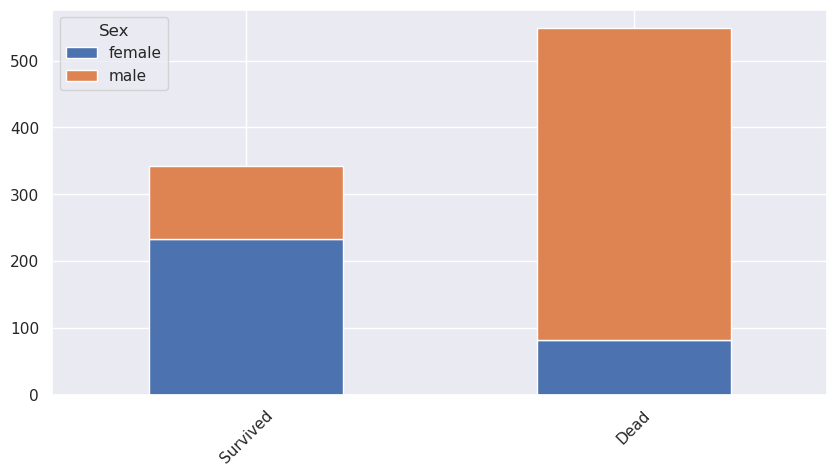

In [26]:
bar_chart('Sex')

### the chart confirms women more likely survived than men

Survived:
Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead:
Pclass
3    372
2     97
1     80
Name: count, dtype: int64


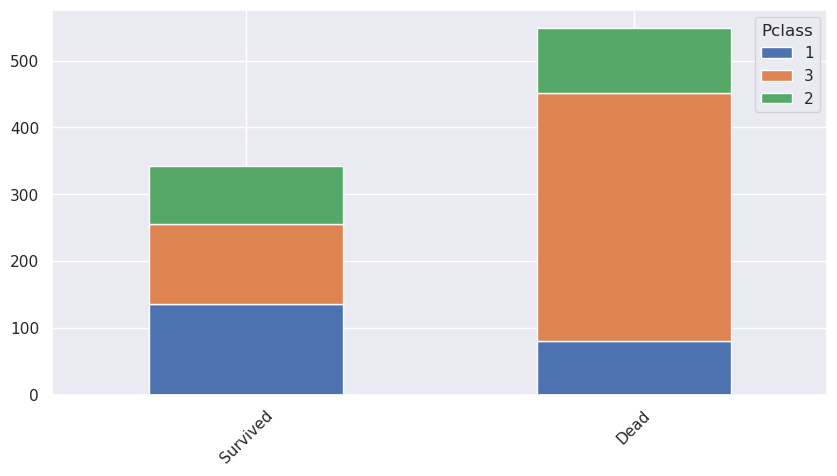

In [27]:
bar_chart('Pclass')

### the chart confirms 1st class more likely survived than othr calss 

### the chart confirms 3st class moer likely dead than othr calss

Survived:
SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead:
SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


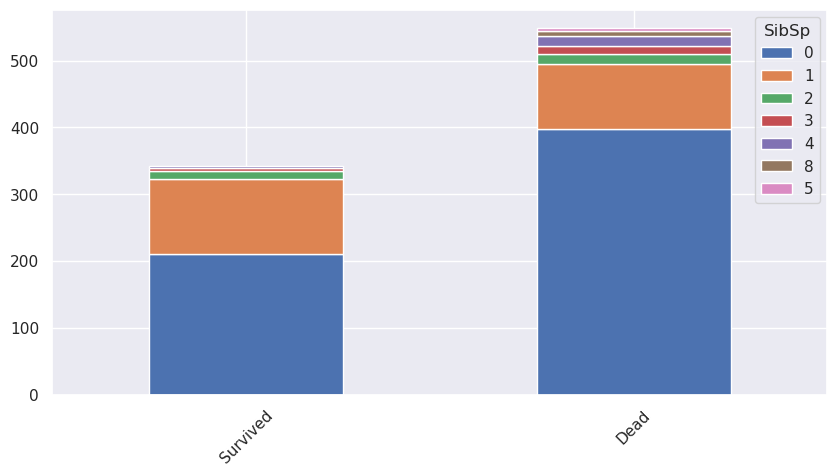

In [28]:
bar_chart('SibSp')

### the chart confirms a person aboarded with more than 2 siblings or spouse more likely survived 
### the chart confirms a person aboarded without siblings or spouse more likely dead

Survived:
Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead:
Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


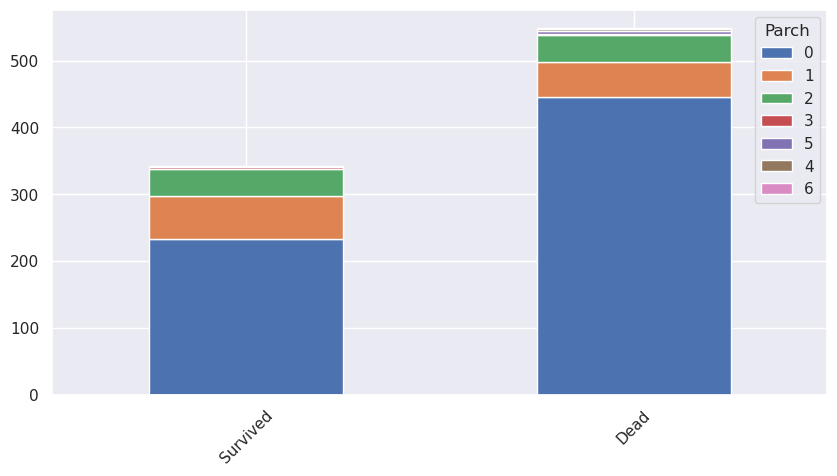

In [29]:
bar_chart('Parch')

### The chart confirms a person aboarded with more than 2 parents or children more likely survived
### The chart confirms a person aboarded alone more likely dead

Survived:
Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Dead:
Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


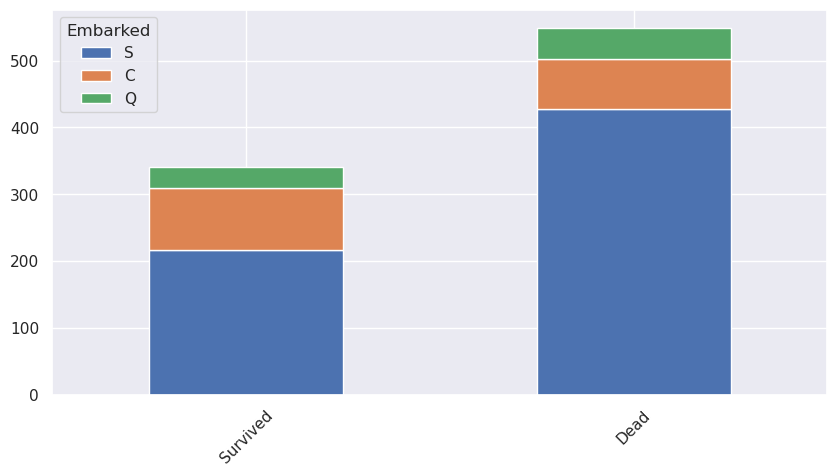

In [30]:
bar_chart('Embarked')

### The Chart confirms a person aboarded from C slightly more likely survived
### The Chart confirms a person aboarded from Q more likely dead
### The Chart confirms a person aboarded from S more likely dead

## 4. Feature engineering

### Feature engineering is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.

### feature vector is an n-dimensional vector of numerical features that represent some object. Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis.

In [31]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [32]:
# Combine dataset
# Combine the training and test datasets
train_test_data = [train,test]

# Extract Titles from Names 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [33]:
# Calculate and display the count of each title in the 'Title' column of the train DataFrame
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [34]:
# Calculate and display the count of each title in the 'Title' column of the train DataFrame
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

### Title Map
### Mr : 0<br> Miss : 1<br>Mrs: 2<br>Others: 3

In [35]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [36]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


Survived:
Title
1    127
2     99
0     81
3     35
Name: count, dtype: int64
Dead:
Title
0    436
1     55
3     32
2     26
Name: count, dtype: int64


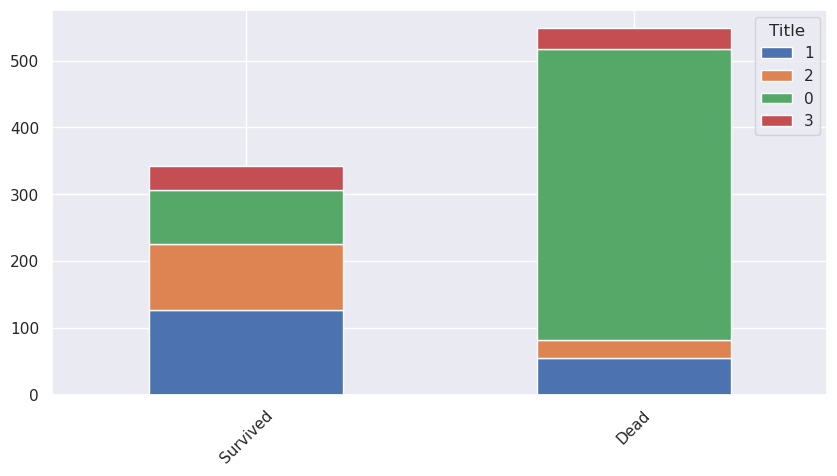

In [38]:
bar_chart('Title')

In [39]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [41]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

Survived:
Sex
1    233
0    109
Name: count, dtype: int64
Dead:
Sex
0    468
1     81
Name: count, dtype: int64


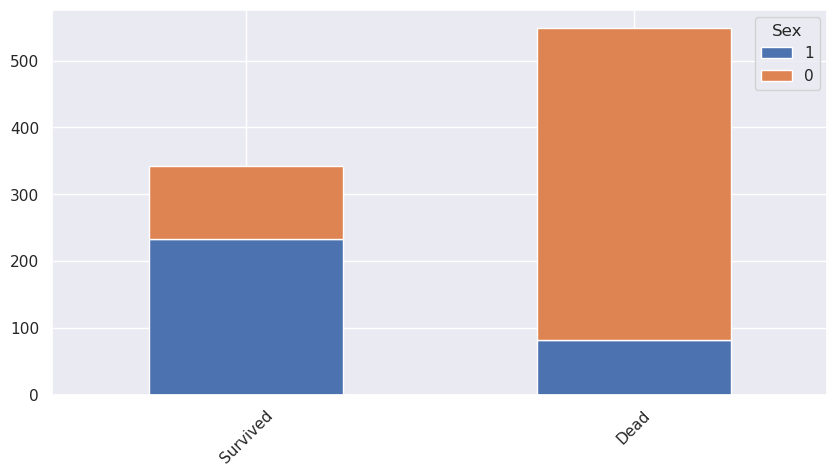

In [42]:
bar_chart('Sex')

In [43]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,,2


In [44]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

In [45]:
train.head(30)
#train.groupby("Title")["Age"].transform("median")

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2


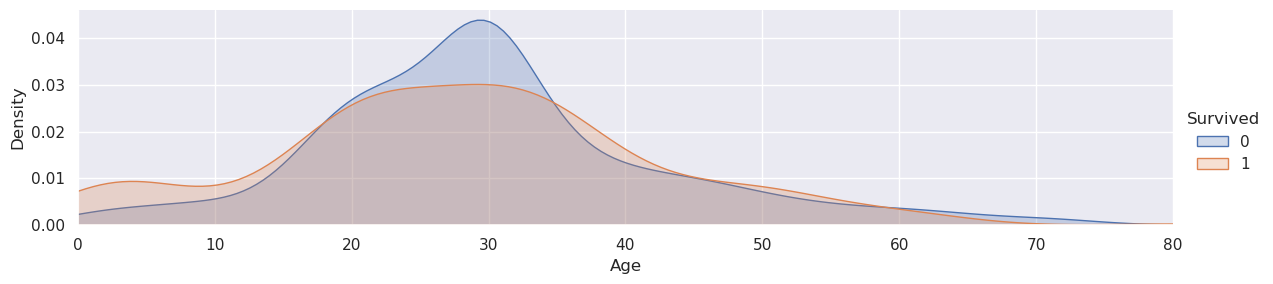

(10.0, 50.0)

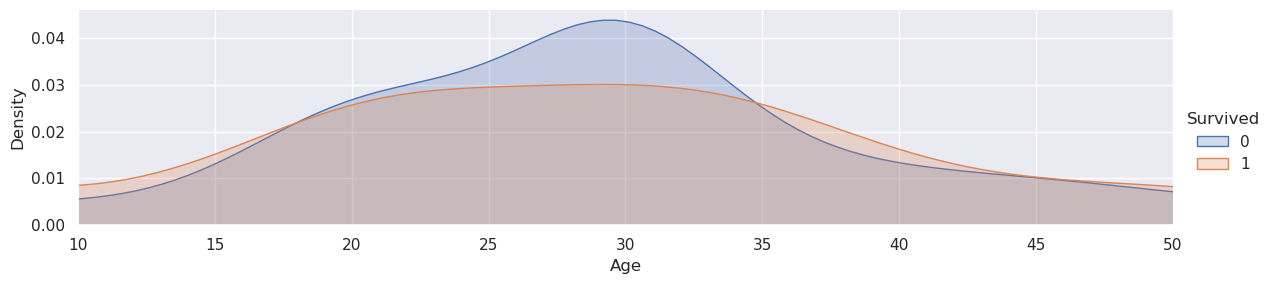

In [46]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

### Those who were 20 to 30 years old were more dead and more survived.

In [47]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age       

### Binning 
### Binning/Converting Numerical Age to Categorical Variable
### feature vector map:

* child: 0
* young: 1
* adult: 2
* mid-age: 3
* senior: 4

In [48]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [49]:
for dataset in train_test_data:
    dataset['Age'] = pd.cut(dataset['Age'],
                           bins=[0,16,26,36,62, float('inf')],
                           labels=[0,1,2,3,4],
                           include_lowest=True)

Survived:
Age
2    116
1     97
3     69
0     57
4      3
Name: count, dtype: int64
Dead:
Age
2    220
1    158
3    111
0     48
4     12
Name: count, dtype: int64


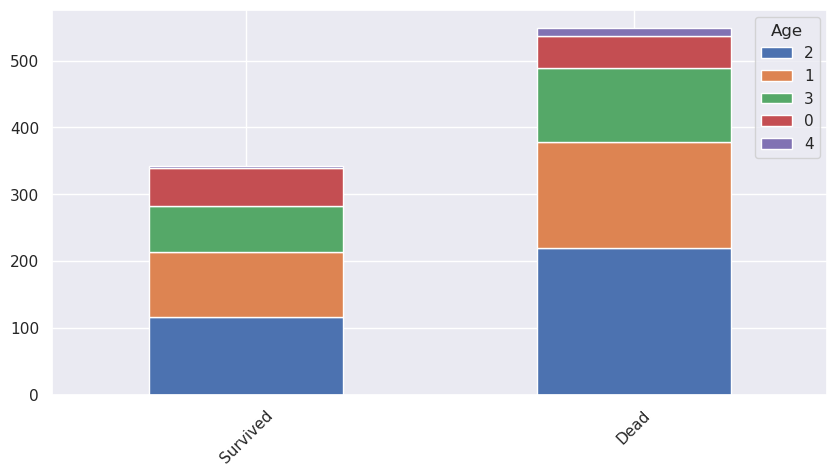

In [50]:
train.head()
bar_chart('Age')

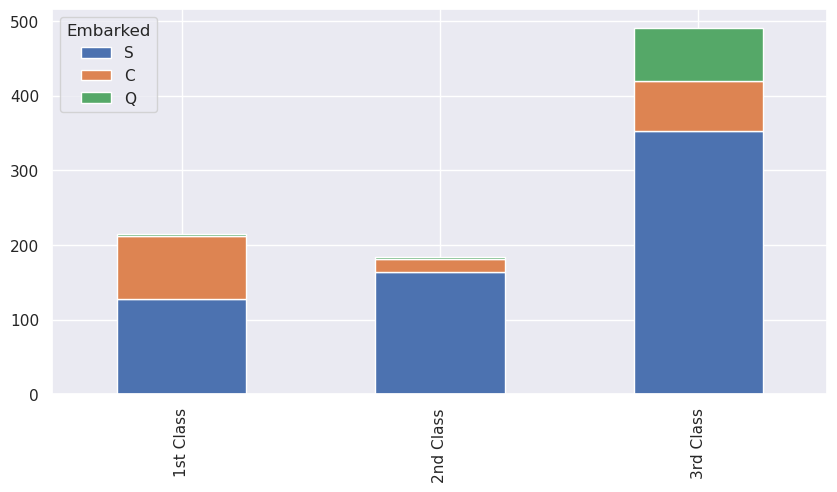

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [51]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

### more than 50 % of 1st class are from S embark.
### more than 50 % of 2st class are from S embark.
### more than 50 % of 3st class are from S embark.
## fill out missing embark with S embark

In [52]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [53]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,2,1,0,113803,53.1000,C123,S,2
5,0,3,0,2,0,0,373450,8.0500,NaN,S,0


In [54]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [55]:
# train["Fare"].fillna(train.groupby("Pclass")["Fare"])
# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# train.head(50)


# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0
2,1,1,1,3,1,0,PC 17599,71.2833,C85,1,2
3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,1,2,1,0,113803,53.1000,C123,0,2
5,0,3,0,2,0,0,373450,8.0500,NaN,0,0
6,0,3,0,2,0,0,330877,8.4583,NaN,2,0
7,0,1,0,3,0,0,17463,51.8625,E46,0,0
8,0,3,0,0,3,1,349909,21.0750,NaN,0,3
9,1,3,1,2,0,2,347742,11.1333,NaN,0,2


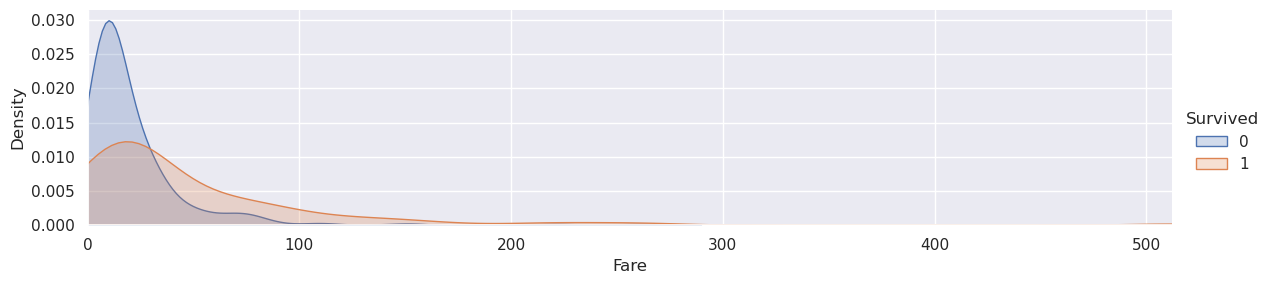

In [56]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', fill = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

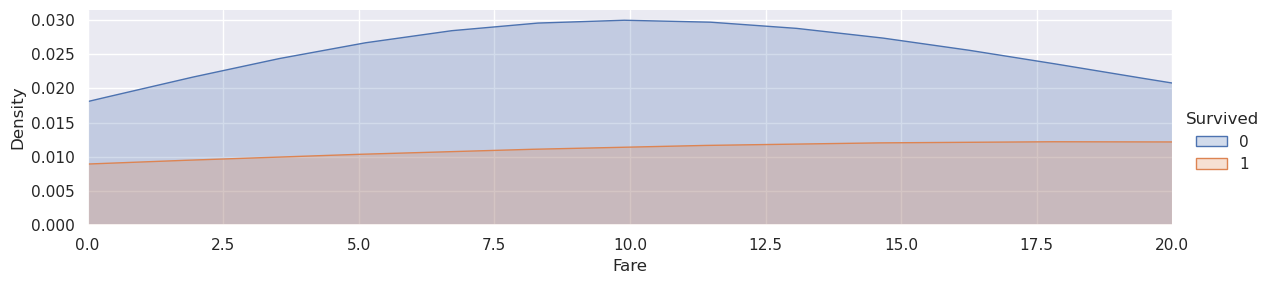

In [57]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 20.0)

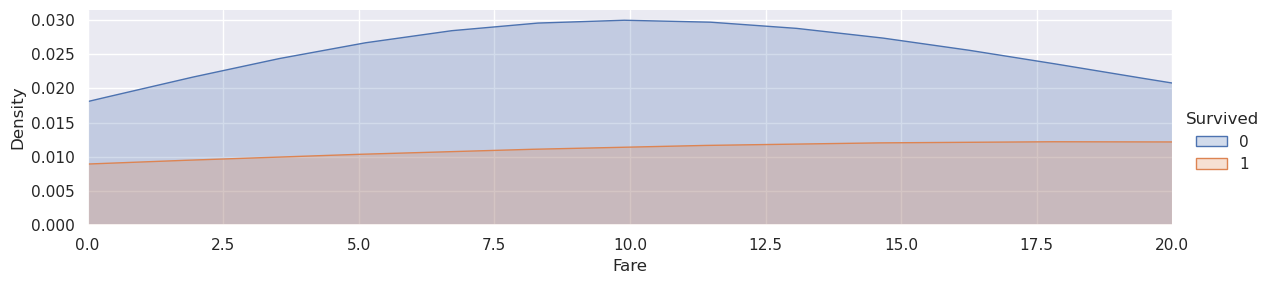

In [58]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [59]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0
2,1,1,1,3,1,0,PC 17599,71.2833,C85,1,2
3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,1,2,1,0,113803,53.1000,C123,0,2
5,0,3,0,2,0,0,373450,8.0500,NaN,0,0


In [60]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [61]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

<AxesSubplot: >

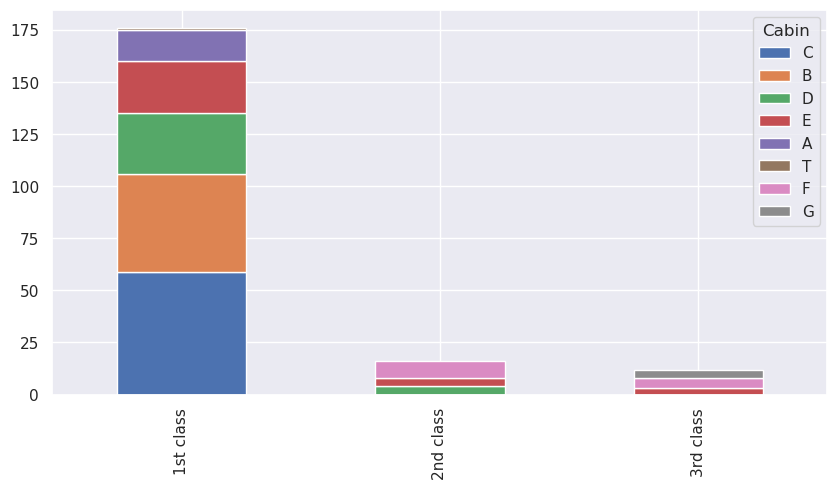

In [62]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [63]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [64]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## family Size

In [65]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

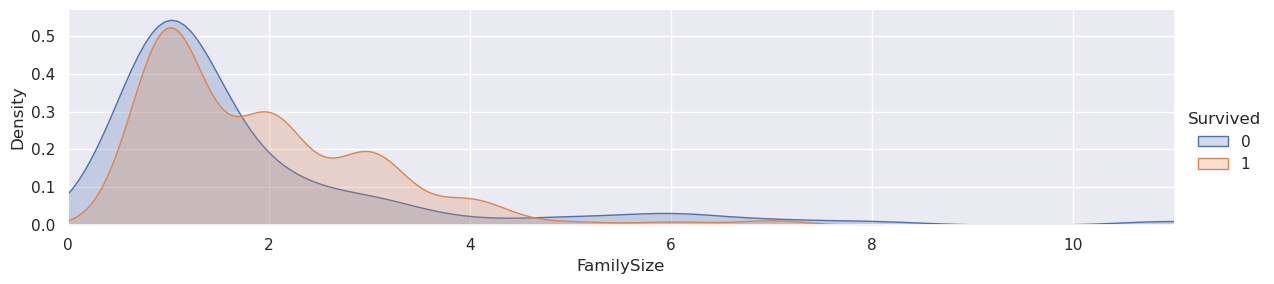

In [66]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [67]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,0,1,1,0,A/5 21171,7.2500,2.0,0,0,0.4
2,1,1,1,3,1,0,PC 17599,71.2833,0.8,1,2,0.4
3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
4,1,1,1,2,1,0,113803,53.1000,0.8,0,2,0.4
5,0,3,0,2,0,0,373450,8.0500,2.0,0,0,0.0


In [69]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)

In [70]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [71]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,
1,3,0,1,7.2500,2.0,0,0,0.4
2,1,1,3,71.2833,0.8,1,2,0.4
3,3,1,1,7.9250,2.0,0,1,0.0
4,1,1,2,53.1000,0.8,0,2,0.4
5,3,0,2,8.0500,2.0,0,0,0.0
6,3,0,2,8.4583,2.0,2,0,0.0
7,1,0,3,51.8625,1.6,0,0,0.0
8,3,0,0,21.0750,2.0,0,3,1.6
9,3,1,2,11.1333,2.0,0,2,0.8


## 5. Modelling

In [72]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Age         891 non-null    category
 4   Fare        891 non-null    float64 
 5   Cabin       891 non-null    float64 
 6   Embarked    891 non-null    int64   
 7   Title       891 non-null    int64   
 8   FamilySize  891 non-null    float64 
dtypes: category(1), float64(3), int64(5)
memory usage: 63.7 KB


## 6.Cross Validation(k-fold)

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [75]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.75280899 0.7752809  0.70786517 0.76404494 0.74157303
 0.76404494 0.74157303 0.74157303 0.78651685]


In [76]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(algorithm='SAMME'),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 74.75
Score of Model 1 : 79.8
Score of Model 2 : 80.03
Score of Model 3 : 79.46
Score of Model 4 : 67.45
Score of Model 5 : 78.57
Score of Model 6 : 81.93
Score of Model 7 : 81.59
Score of Model 8 : 79.24


In [77]:
clf1 = SVC()
clf1.fit(train_data, target)
test
test_data = test.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data)
# test_data


In [78]:
test_data['Survived'] = prediction
submission = pd.DataFrame(test['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")